In [31]:
#For web requests
import requests

#To save the data
import pandas as pd

#convert the response to json
import json

#Numerical manipulation
import numpy as np

#parse the datetimes 
from datetime import datetime

#For ploting graphs and charts
import matplotlib.pyplot as plt 

import math
df = pd.read_csv("housing.csv")

import seaborn as sns
sns.set()
# df = pd.read_csv("data.csv")

In [32]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [34]:
len(df)

21613

In [35]:
#initialize X and y value
y = df["price"]

In [36]:
#---------------------------------
#            FUNCTIONS
#---------------------------------

# Calculate the mean of a column
def col_mean (col):
    col_sum = col.sum()
    mean_col = col_sum/len(col) 
    return mean_col

# Calculate the standard Deviation
def col_std (col):
    temp_mean = col_mean(col)
    sum_total = 0
    for i in range(len(col)):
        sum_total += (col[i]-temp_mean)**2
        
    return math.sqrt((sum_total * 1.0) / len(col))

# Calculate the Correlation Coefficient
def cor_Coe(x, y):
    #getting the mean value of Y
    y_values = y.to_numpy()
    y_mean = y_values.mean()
    #getting the mean value of X
    x_values = x.to_numpy()
    x_mean = x_values.mean()
    sum_top = sum((x_values - x_mean) * (y_values- y_mean))
    sum_bottom = np.sqrt(sum((x_values - x_mean)**2) * sum((y_values - y_mean)**2))
        
    return sum_top / sum_bottom


In [41]:
p_bathroom = cor_Coe(df["bathrooms"], y)
p_sqft_living = cor_Coe(df["sqft_living"], y)
p_sqft_loft = cor_Coe(df["sqft_lot"], y)
p_sqft_above = cor_Coe(df["sqft_above"], y)

# p = cor_Coe(X, y)
print(f" correlation relation values = {p_bathroom} | {p_sqft_living} | {p_sqft_loft} | {p_sqft_above}")



 correlation relation values = 0.49130879873118966 | 0.6793472923105847 | 0.1611133590234814 | 0.5837195592522831


In [38]:
#Kernaelization
df["bathrooms"] = df["bathrooms"] ** p_bathroom
df["sqft_living"] = df["sqft_living"] ** p_sqft_living
df["sqft_lot"] = df["sqft_lot"] ** p_sqft_loft
df["sqft_above"] = df["sqft_above"] ** p_sqft_above

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.000000,143.406505,2.169761,1.0,0,0,...,7,72.482187,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,1.530891,247.680940,2.218596,2.0,0,0,...,7,104.821630,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.000000,106.271711,2.283723,1.0,0,0,...,6,55.971171,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,1.780550,204.776054,2.146114,1.0,0,0,...,7,67.535706,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,1.439071,183.772354,2.240484,1.0,0,0,...,8,89.772192,0,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
#Setting multiple X values
x_values = ["bathrooms","sqft_living", "sqft_lot", "sqft_above"]
X = df[x_values]

multipleX = 4


#Set the values of m and c initially to 0
m = np.zeros(multipleX)
c = 0

#learning rate
L = 0.000001 

num_X = float(len(X))

#Loss function and the Gradient descent
for i in range(30):
    pred_Y = np.dot(X, m) + c
    
    Dm = (1 / num_X) * (2 * np.dot(X.T, (pred_Y - y)))
    
    Dc = (1 / num_X) * (2 * np.sum(pred_Y - y))

    
  
    m = m - L * Dm
    c = c - L * Dc

print(m, c)



[  13.56340326 2224.98933604   18.70291722  908.22423611] 8.228403023822002


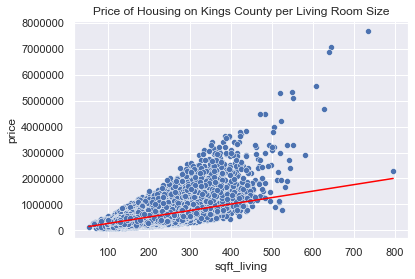

In [40]:
# Predicting the Y_value
y_pred = m[0] * df["bathrooms"] + m[1] * df["sqft_living"] + m[2] * df["sqft_lot"] + m[3] * df["sqft_above"] + c

x_values = df["sqft_living"]
y_values = df["price"]

# Graphing the using m and c val
ax = sns.scatterplot(data= df, x = "sqft_living", y = "price");
plt.plot([min(x_values), max(x_values)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.ticklabel_format(style='plain', axis='y')
plt.title("Price of Housing on Kings County per Living Room Size")

plt.show()